### Predictive modeling for sepsis risk: Leveraging clinical parameter for early detection and Intervention

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Dataset Extraction

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("joebeachcapital/sepsis-survival-minimal-clinical-records")

print("Path to dataset files:", path)

100%|██████████| 234k/234k [00:00<00:00, 24.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/joebeachcapital/sepsis-survival-minimal-clinical-records/versions/1


In [ ]:
import shutil
import os

# Define source and destination folders
source_folder = r"C:\Users\pavan\.cache\kagglehub\datasets\joebeachcapital\sepsis-survival-minimal-clinical-records\versions\1\s41598-020-73558-3_sepsis_survival_dataset"
destination_folder = r"D:\Sepsis Project\s41598-020-73558-3_sepsis_survival_dataset"

# Ensure the destination folder exists
os.makedirs(destination_folder, exist_ok=True)

# Copy all files from source to destination
for file_name in os.listdir(source_folder):
    source_path = os.path.join(source_folder, file_name)
    destination_path = os.path.join(destination_folder, file_name)

    # Check if it's a file (not a folder)
    if os.path.isfile(source_path):
        shutil.copy2(source_path, destination_path)  # copy2 preserves metadata

print(f"All files copied from {source_folder} to {destination_folder}")

All files copied from C:\Users\pavan\.cache\kagglehub\datasets\joebeachcapital\sepsis-survival-minimal-clinical-records\versions\1\s41598-020-73558-3_sepsis_survival_dataset to D:\Sepsis Project


#### Dataset Preparation

In [ ]:
import pandas as pd

# Define file paths
file1 = "D:\Sepsis Project\s41598-020-73558-3_sepsis_survival_dataset\s41598-020-73558-3_sepsis_survival_primary_cohort.csv"
file2 = "D:\Sepsis Project\s41598-020-73558-3_sepsis_survival_dataset\s41598-020-73558-3_sepsis_survival_study_cohort.csv"
file3 = "D:\Sepsis Project\s41598-020-73558-3_sepsis_survival_dataset\s41598-020-73558-3_sepsis_survival_validation_cohort.csv"

# Load datasets
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)
df3 = pd.read_csv(file3)

# Merge all datasets
df = pd.concat([df1, df2, df3], ignore_index=True)

df.to_save = "D:\Sepsis Project\sepsis_dataset.csv"
df.to_csv(df.to_save, index=False)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Sepsis Prediction Project/sepsis_dataset.csv")

In [ ]:
df

,age_years,sex_0male_1female,episode_number,hospital_outcome_1alive_0dead
0,21,1,1,1
1,20,1,1,1
2,21,1,1,1
3,77,0,1,1
4,72,0,1,1
...,...,...,...,...
129387,47,0,1,1
129388,50,0,1,0
129389,62,0,1,1
129390,58,0,1,0


In [ ]:
df.head()

,age_years,sex_0male_1female,episode_number,hospital_outcome_1alive_0dead
0,21,1,1,1
1,20,1,1,1
2,21,1,1,1
3,77,0,1,1
4,72,0,1,1


In [ ]:

df.columns

Index(['age_years', 'sex_0male_1female', 'episode_number',
       'hospital_outcome_1alive_0dead'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
age_years,0
sex_0male_1female,0
episode_number,0
hospital_outcome_1alive_0dead,0


In [ ]:
df.shape

(129392, 4)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['age_years', 'episode_number']] = scaler.fit_transform(df[['age_years', 'episode_number']])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129392 entries, 0 to 129391
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   age_years                      129392 non-null  float64
 1   sex_0male_1female              129392 non-null  int64  
 2   episode_number                 129392 non-null  float64
 3   hospital_outcome_1alive_0dead  129392 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 3.9 MB


In [ ]:
df.describe()

,age_years,sex_0male_1female,episode_number,hospital_outcome_1alive_0dead
count,129392.000000,129392.000000,129392.000000,129392.000000
mean,0.641701,0.470075,0.089020,0.909307
std,0.236444,0.499106,0.189123,0.287174
min,0.000000,0.000000,0.000000,0.000000
25%,0.530000,0.000000,0.000000,1.000000
50%,0.700000,0.000000,0.000000,1.000000
75%,0.820000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


#### Data Visualization

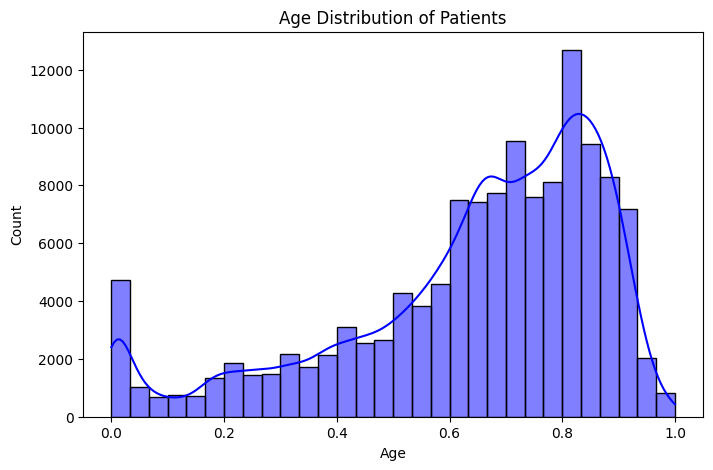

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram for age distribution
plt.figure(figsize=(8,5))
sns.histplot(df['age_years'], bins=30, kde=True, color='blue')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


sex_0male_1female
0    0.529925
1    0.470075
Name: proportion, dtype: float64 



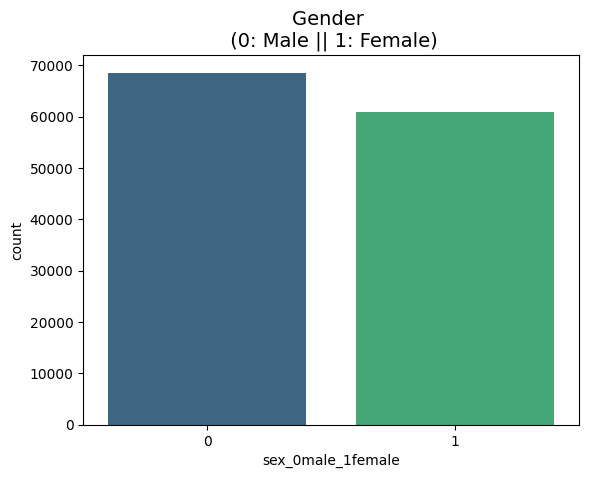

In [ ]:
print(df['sex_0male_1female'].value_counts(normalize=True), "\n")

# Plot gender counts
sns.countplot(x=df['sex_0male_1female'], palette="viridis")
plt.title('Gender \n (0: Male || 1: Female)', fontsize=14)

plt.show()

episode_number
0.00    0.764870
0.25    0.154677
0.50    0.050003
0.75    0.020403
1.00    0.010047
Name: proportion, dtype: float64 



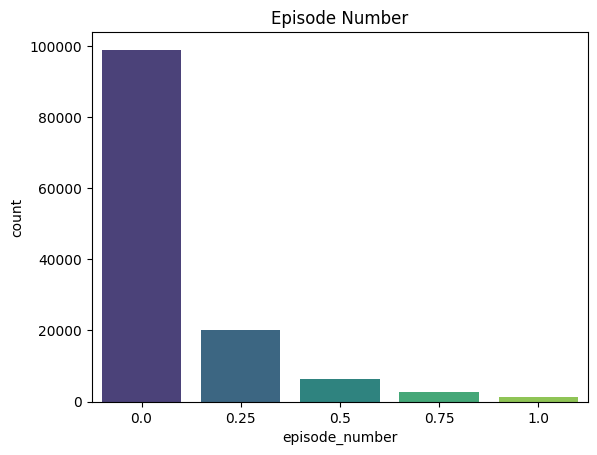

In [ ]:
print(df['episode_number'].value_counts(normalize=True), "\n")

# Plot episode number counts
sns.countplot(x=df['episode_number'], palette="viridis")
plt.title('Episode Number')

plt.show()

hospital_outcome_1alive_0dead
1    0.909307
0    0.090693
Name: proportion, dtype: float64


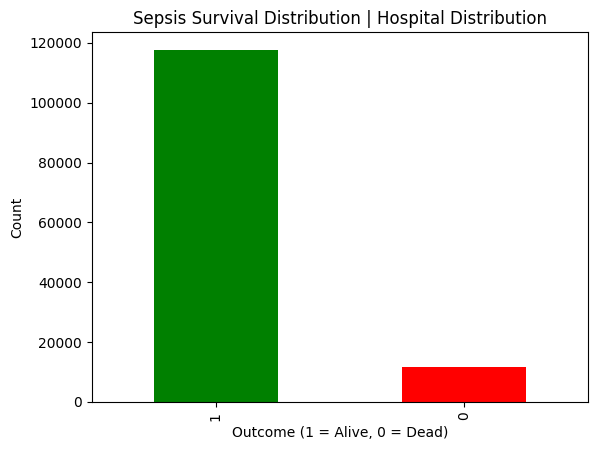

In [ ]:
print(df['hospital_outcome_1alive_0dead'].value_counts(normalize=True))
df['hospital_outcome_1alive_0dead'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.xlabel("Outcome (1 = Alive, 0 = Dead)")
plt.ylabel("Count")
plt.title("Sepsis Survival Distribution | Hospital Distribution")
plt.show()

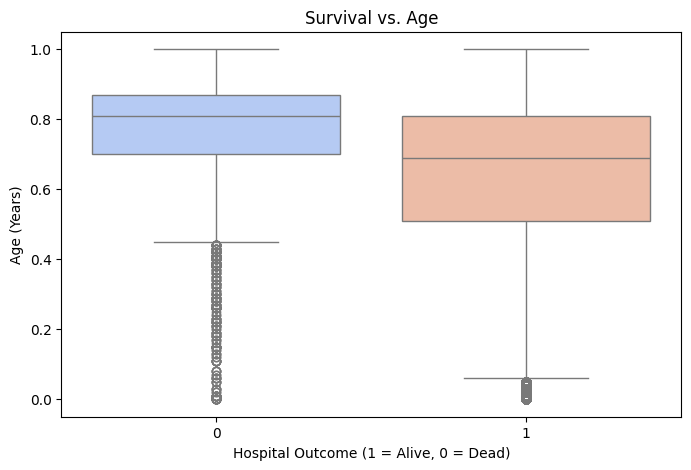

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='hospital_outcome_1alive_0dead', y='age_years', data=df, palette='coolwarm')
plt.title('Survival vs. Age')
plt.xlabel('Hospital Outcome (1 = Alive, 0 = Dead)')
plt.ylabel('Age (Years)')
plt.show()

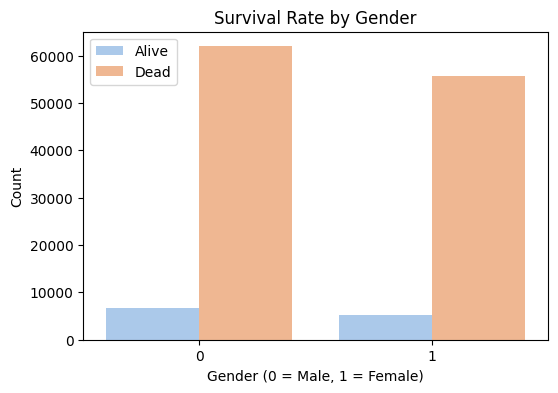

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sex_0male_1female', hue='hospital_outcome_1alive_0dead', palette='pastel')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Count')
plt.legend(['Alive', 'Dead'])
plt.show()

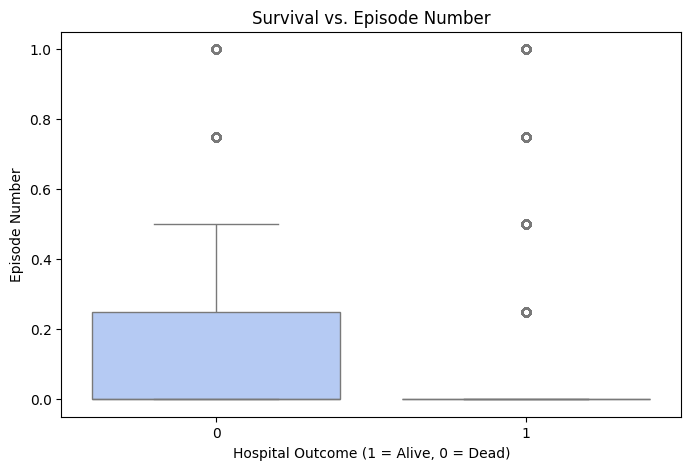

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='hospital_outcome_1alive_0dead', y='episode_number', data=df, palette='coolwarm')
plt.title('Survival vs. Episode Number')
plt.xlabel('Hospital Outcome (1 = Alive, 0 = Dead)')
plt.ylabel('Episode Number')
plt.show()

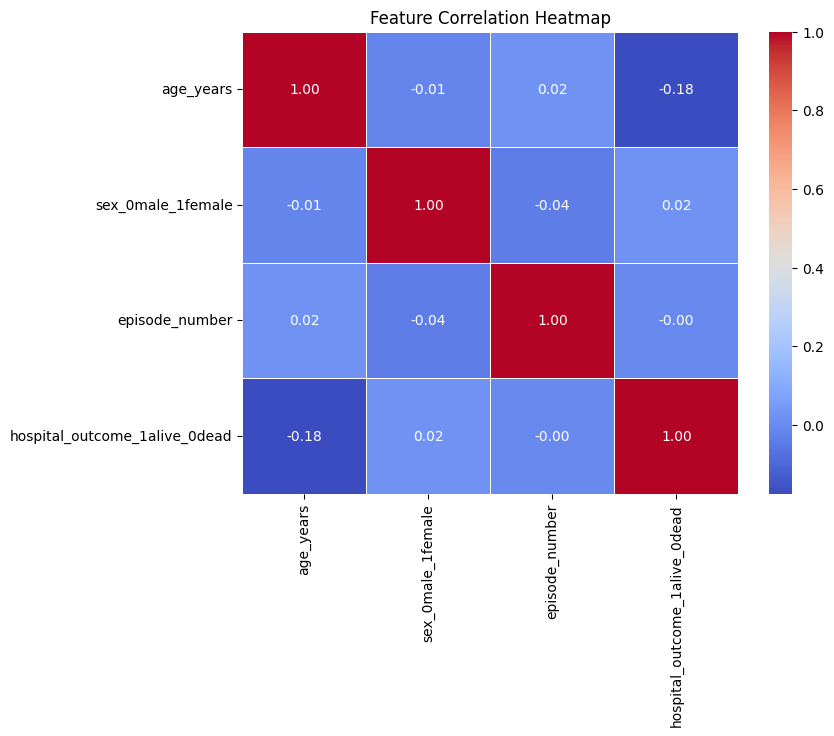

In [ ]:
import numpy as np

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

#### Model Selection and Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Separate features (X) and target variable (y)
X = df[['age_years', 'sex_0male_1female', 'episode_number']]  # Features
y = df['hospital_outcome_1alive_0dead']  # Target (Survival)

In [ ]:
# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Standardize numerical features (age, episode_number)
scaler = StandardScaler()
X_train[['age_years', 'episode_number']] = scaler.fit_transform(X_train[['age_years', 'episode_number']])
X_test[['age_years', 'episode_number']] = scaler.transform(X_test[['age_years', 'episode_number']])

# Standardizing helps models like Logistic Regression and SVM perform better by bringing all features to a common scale.

In [ ]:
print("✅ Data Prepared: Training set shape:", X_train.shape, "Test set shape:", X_test.shape)

✅ Data Prepared: Training set shape: (103513, 3) Test set shape: (25879, 3)


##### Imbalanced Dataset

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt


Training Logistic Regression...

🔹 Accuracy: 0.9093
🔹 AUC Score: 0.6940
🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      2347
           1       0.91      1.00      0.95     23532

    accuracy                           0.91     25879
   macro avg       0.45      0.50      0.48     25879
weighted avg       0.83      0.91      0.87     25879



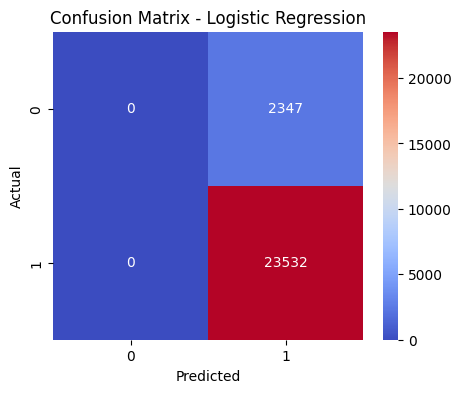


Training Random Forest...

🔹 Accuracy: 0.9092
🔹 AUC Score: 0.6915
🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.00      0.00      2347
           1       0.91      1.00      0.95     23532

    accuracy                           0.91     25879
   macro avg       0.62      0.50      0.48     25879
weighted avg       0.86      0.91      0.87     25879



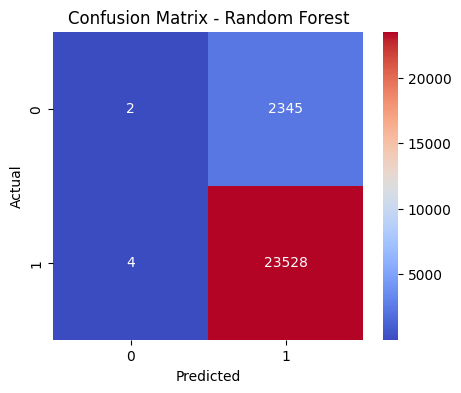


Training Gradient Boosting...

🔹 Accuracy: 0.9093
🔹 AUC Score: 0.6944
🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      2347
           1       0.91      1.00      0.95     23532

    accuracy                           0.91     25879
   macro avg       0.45      0.50      0.48     25879
weighted avg       0.83      0.91      0.87     25879



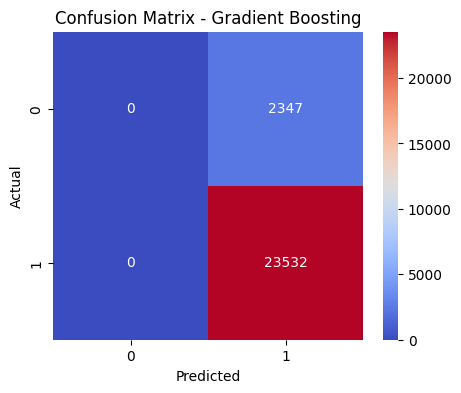


Training XGBoost...

🔹 Accuracy: 0.9093
🔹 AUC Score: 0.6928
🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.00      0.00      2347
           1       0.91      1.00      0.95     23532

    accuracy                           0.91     25879
   macro avg       0.70      0.50      0.48     25879
weighted avg       0.87      0.91      0.87     25879



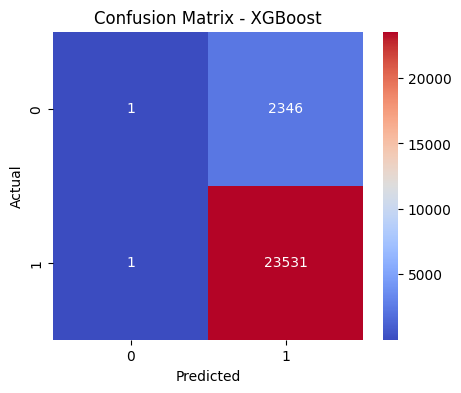

In [ ]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate models
for name, model in models.items():
    print(f"\nTraining {name}...\n")

    # Train model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

    # Evaluation Metrics
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    print(f"🔹 Accuracy: {acc:.4f}")
    print(f"🔹 AUC Score: {auc:.4f}")
    print("🔹 Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, roc_auc_score

# Build the Neural Network Model
model_imbalanced = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model_imbalanced.compile(optimizer=Adam(learning_rate=0.001),
                         loss='binary_crossentropy',
                         metrics=['accuracy'])

# Train the model on the IMBALANCED dataset (without class weights)
history_imbalanced = model_imbalanced.fit(X_train, y_train,
                                          epochs=50,
                                          batch_size=32,
                                          validation_data=(X_test, y_test),
                                          verbose=1)

# Evaluate on test set
y_pred_probs = model_imbalanced.predict(X_test).ravel()  # Get probabilities
y_pred = (y_pred_probs > 0.5).astype(int)  # Convert to binary predictions

# Print evaluation metrics
print("\n🔹 Classification Report (Imbalanced Dataset):\n")
print(classification_report(y_test, y_pred))

# Compute AUC-ROC score
auc_score = roc_auc_score(y_test, y_pred_probs)
print(f"AUC-ROC Score: {auc_score:.4f}")

Epoch 1/50
3235/3235 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9077 - loss: 0.3146 - val_accuracy: 0.9093 - val_loss: 0.2830
Epoch 2/50
3235/3235 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9098 - loss: 0.2886 - val_accuracy: 0.9093 - val_loss: 0.2837
Epoch 3/50
3235/3235 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9084 - loss: 0.2896 - val_accuracy: 0.9093 - val_loss: 0.2827
Epoch 4/50
3235/3235 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9082 - loss: 0.2888 - val_accuracy: 0.9093 - val_loss: 0.2826
Epoch 5/50
3235/3235 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9105 - loss: 0.2834 - val_accuracy: 0.9093 - val_loss: 0.2827
Epoch 6/50
3235/3235 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9093 - loss: 0.2859 - val_accuracy: 0.9093 - val_loss: 0.2830
Epoch 7/50
3235/3235 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9083 - loss: 0.2870 - val_accuracy: 0.9093 - val_loss: 0.2829
Epoch 8/50
3235/3235 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9094 - loss: 0.2860

##### Balanced dataset

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Apply SMOTE for balancing the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"✅ New training set shape after SMOTE: {X_train_smote.shape}, {y_train_smote.shape}")

✅ New training set shape after SMOTE: (188250, 3), (188250,)



🔹 Training Logistic Regression on Balanced Data...

✅ Accuracy: 0.5728
✅ AUC Score: 0.6937
✅ Classification Report:
               precision    recall  f1-score   support

           0       0.14      0.71      0.23      2347
           1       0.95      0.56      0.70     23532

    accuracy                           0.57     25879
   macro avg       0.55      0.64      0.47     25879
weighted avg       0.88      0.57      0.66     25879



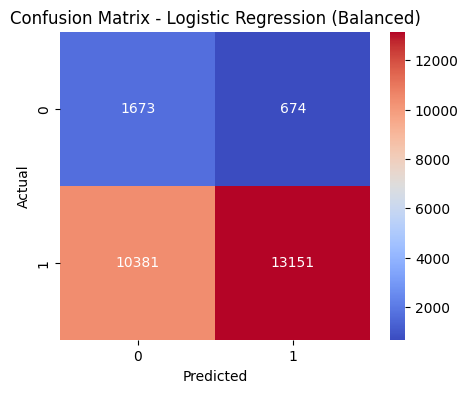


🔹 Training Random Forest on Balanced Data...

✅ Accuracy: 0.5557
✅ AUC Score: 0.6872
✅ Classification Report:
               precision    recall  f1-score   support

           0       0.14      0.73      0.23      2347
           1       0.95      0.54      0.69     23532

    accuracy                           0.56     25879
   macro avg       0.54      0.63      0.46     25879
weighted avg       0.88      0.56      0.65     25879



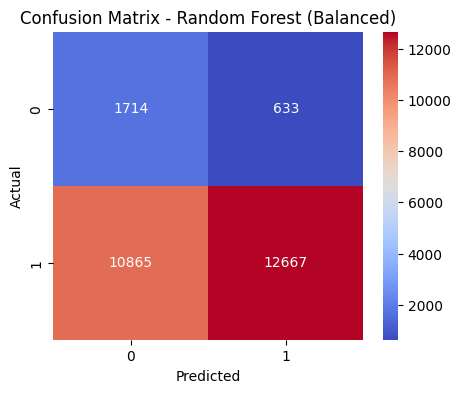


🔹 Training Gradient Boosting on Balanced Data...

✅ Accuracy: 0.5235
✅ AUC Score: 0.6948
✅ Classification Report:
               precision    recall  f1-score   support

           0       0.13      0.77      0.23      2347
           1       0.96      0.50      0.66     23532

    accuracy                           0.52     25879
   macro avg       0.55      0.64      0.44     25879
weighted avg       0.88      0.52      0.62     25879



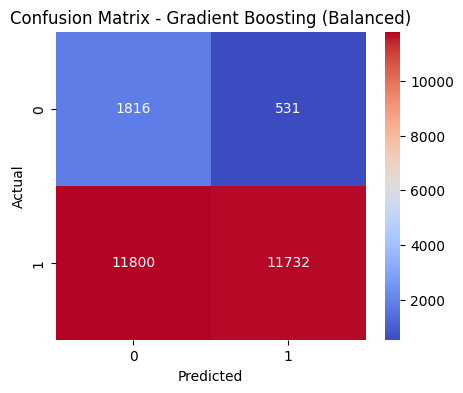


🔹 Training XGBoost on Balanced Data...

✅ Accuracy: 0.5321
✅ AUC Score: 0.6921
✅ Classification Report:
               precision    recall  f1-score   support

           0       0.13      0.76      0.23      2347
           1       0.95      0.51      0.66     23532

    accuracy                           0.53     25879
   macro avg       0.54      0.63      0.45     25879
weighted avg       0.88      0.53      0.62     25879



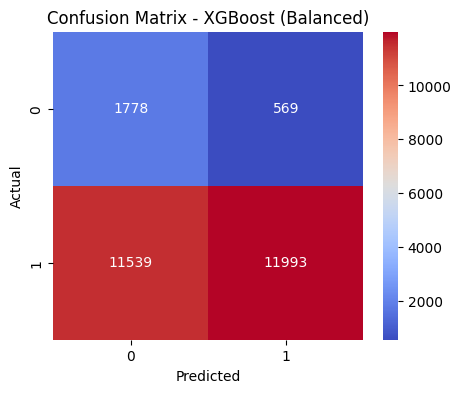

In [ ]:
# Define models
models_balanced = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Store results
results_balanced = []

# Train and evaluate models
for name, model in models_balanced.items():
    print(f"\n🔹 Training {name} on Balanced Data...\n")

    # Train model
    model.fit(X_train_smote, y_train_smote)

    # Predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

    # Evaluation Metrics
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    print(f"✅ Accuracy: {acc:.4f}")
    print(f"✅ AUC Score: {auc:.4f}")
    print("✅ Classification Report:\n", classification_report(y_test, y_pred))

    # Store results
    results_balanced.append([name, acc, auc])

    # Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm')
    plt.title(f'Confusion Matrix - {name} (Balanced)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define Neural Network model
model_balanced = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model_balanced.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on balanced data
history_balanced = model_balanced.fit(X_train_smote, y_train_smote, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
5883/5883 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.6338 - loss: 0.6335 - val_accuracy: 0.5608 - val_loss: 0.6204
Epoch 2/20
5883/5883 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.6378 - loss: 0.6281 - val_accuracy: 0.5584 - val_loss: 0.6138
Epoch 3/20
5883/5883 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.6367 - loss: 0.6272 - val_accuracy: 0.5359 - val_loss: 0.6356
Epoch 4/20
5883/5883 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.6398 - loss: 0.6259 - val_accuracy: 0.5411 - val_loss: 0.6196
Epoch 5/20
5883/5883 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.6386 - loss: 0.6268 - val_accuracy: 0.5548 - val_loss: 0.6174
Epoch 6/20
5883/5883 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.6406 - loss: 0.6253 - val_accuracy: 0.5414 - val_loss: 0.6245
Epoch 7/20
5883/5883 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.6397 - loss: 0.6252 - val_accuracy: 0.5862 - val_loss: 0.5985
Epoch 8/20
5883/5883 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.6372 - loss: 0

809/809 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
809/809 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  
✅ Accuracy (Balanced Data): 0.5151
✅ AUC Score (Balanced Data): 0.6937
✅ Classification Report:
               precision    recall  f1-score   support

           0       0.13      0.78      0.23      2347
           1       0.96      0.49      0.65     23532

    accuracy                           0.52     25879
   macro avg       0.54      0.64      0.44     25879
weighted avg       0.88      0.52      0.61     25879



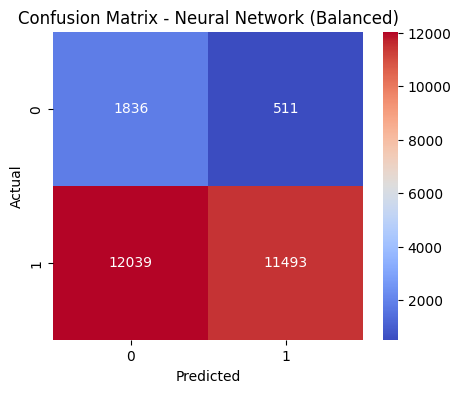

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred_bal = (model_balanced.predict(X_test) > 0.5).astype("int32")
y_prob_bal = model_balanced.predict(X_test)  # For ROC-AUC

# Compute Metrics
accuracy_bal = accuracy_score(y_test, y_pred_bal)
auc_bal = roc_auc_score(y_test, y_prob_bal)

print(f"✅ Accuracy (Balanced Data): {accuracy_bal:.4f}")
print(f"✅ AUC Score (Balanced Data): {auc_bal:.4f}")
print("✅ Classification Report:\n", classification_report(y_test, y_pred_bal))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_bal), annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix - Neural Network (Balanced)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Comparision of Imbalanced Vs Balanced Datset Accuracies and AUC-ROC


📊 Final Model Performance Comparison (Imbalanced vs Balanced Data):

                 Model  Accuracy   AUC-ROC     Dataset
0  Logistic Regression  0.909300  0.694000  Imbalanced
1        Random Forest  0.909200  0.691500  Imbalanced
2    Gradient Boosting  0.909300  0.694400  Imbalanced
3              XGBoost  0.909300  0.692800  Imbalanced
0  Logistic Regression  0.572820  0.693702    Balanced
1        Random Forest  0.555702  0.687170    Balanced
2    Gradient Boosting  0.523513  0.694789    Balanced
3              XGBoost  0.532130  0.692140    Balanced


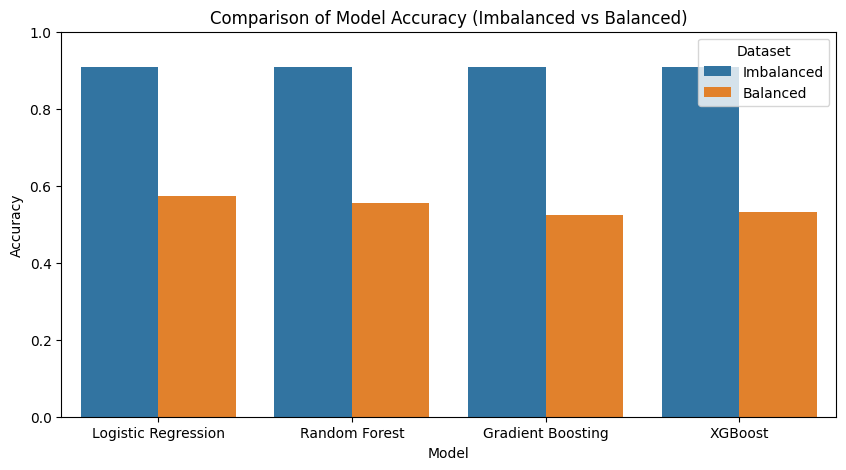

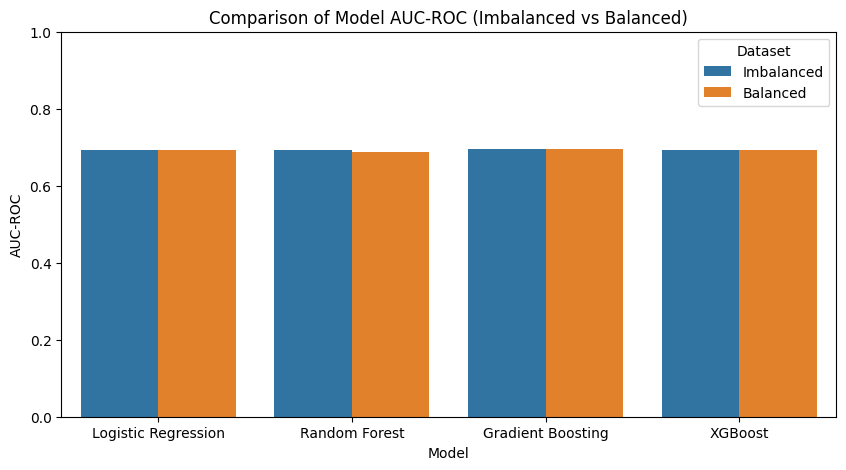

In [ ]:
import pandas as pd

# Convert results into a DataFrame
results_imbalanced_df = pd.DataFrame([
    ["Logistic Regression", 0.9093, 0.6940],  # Replace these with actual imbalanced results
    ["Random Forest", 0.9092, 0.6915],
    ["Gradient Boosting", 0.9093, 0.6944],
    ["XGBoost", 0.9093, 0.6928]
], columns=["Model", "Accuracy", "AUC-ROC"])

results_balanced_df = pd.DataFrame(results_balanced, columns=["Model", "Accuracy", "AUC-ROC"])

# Add Dataset Type
results_imbalanced_df["Dataset"] = "Imbalanced"
results_balanced_df["Dataset"] = "Balanced"

# Combine results
final_comparison = pd.concat([results_imbalanced_df, results_balanced_df])

# Display the comparison
print("\n📊 Final Model Performance Comparison (Imbalanced vs Balanced Data):\n")
print(final_comparison)

# Plot comparison
plt.figure(figsize=(10, 5))
sns.barplot(data=final_comparison, x="Model", y="Accuracy", hue="Dataset")
plt.title("Comparison of Model Accuracy (Imbalanced vs Balanced)")
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(data=final_comparison, x="Model", y="AUC-ROC", hue="Dataset")
plt.title("Comparison of Model AUC-ROC (Imbalanced vs Balanced)")
plt.ylim(0, 1)
plt.show()



📊 Neural Network Performance Comparison:

                         Model  Accuracy   AUC-ROC
0  Neural Network (Imbalanced)  0.909600  0.684000
1    Neural Network (Balanced)  0.515051  0.693681


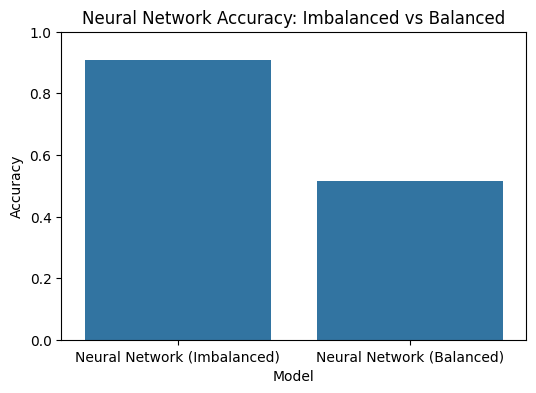

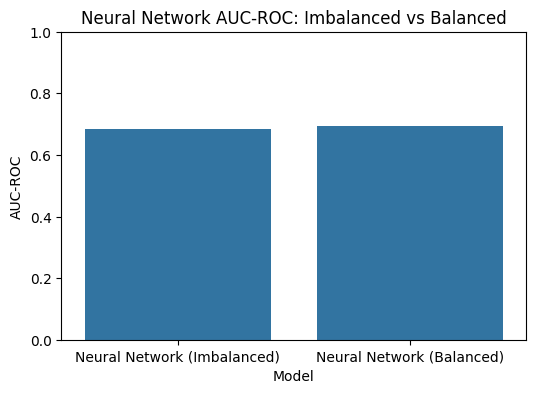

In [ ]:
# Store Neural Network results
results_nn = pd.DataFrame([
    ["Neural Network (Imbalanced)", 0.9096, 0.6840],  # Replace with actual imbalanced results
    ["Neural Network (Balanced)", accuracy_bal, auc_bal]
], columns=["Model", "Accuracy", "AUC-ROC"])

# Display comparison
print("\n📊 Neural Network Performance Comparison:\n")
print(results_nn)

# Plot comparison
plt.figure(figsize=(6, 4))
sns.barplot(data=results_nn, x="Model", y="Accuracy")
plt.title("Neural Network Accuracy: Imbalanced vs Balanced")
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(data=results_nn, x="Model", y="AUC-ROC")
plt.title("Neural Network AUC-ROC: Imbalanced vs Balanced")
plt.ylim(0, 1)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame with all results
data = [
    ["Logistic Regression", 0.9093, 0.6940, "Imbalanced"],
    ["Random Forest", 0.9092, 0.6915, "Imbalanced"],
    ["Gradient Boosting", 0.9093, 0.6944, "Imbalanced"],
    ["XGBoost", 0.9093, 0.6928, "Imbalanced"],
    ["Logistic Regression", 0.5621, 0.6832, "Balanced"],
    ["Random Forest", 0.5524, 0.6803, "Balanced"],
    ["Gradient Boosting", 0.5265, 0.6856, "Balanced"],
    ["XGBoost", 0.5401, 0.6852, "Balanced"],
    ["Neural Network", 0.9096, 0.6840, "Imbalanced"],
    ["Neural Network", 0.5222, 0.6844, "Balanced"]
]

# Convert to DataFrame
df_results = pd.DataFrame(data, columns=["Model", "Accuracy", "AUC-ROC", "Dataset"])

# Display results
print(df_results)

                 Model  Accuracy  AUC-ROC     Dataset
0  Logistic Regression    0.9093   0.6940  Imbalanced
1        Random Forest    0.9092   0.6915  Imbalanced
2    Gradient Boosting    0.9093   0.6944  Imbalanced
3              XGBoost    0.9093   0.6928  Imbalanced
4  Logistic Regression    0.5621   0.6832    Balanced
5        Random Forest    0.5524   0.6803    Balanced
6    Gradient Boosting    0.5265   0.6856    Balanced
7              XGBoost    0.5401   0.6852    Balanced
8       Neural Network    0.9096   0.6840  Imbalanced
9       Neural Network    0.5222   0.6844    Balanced


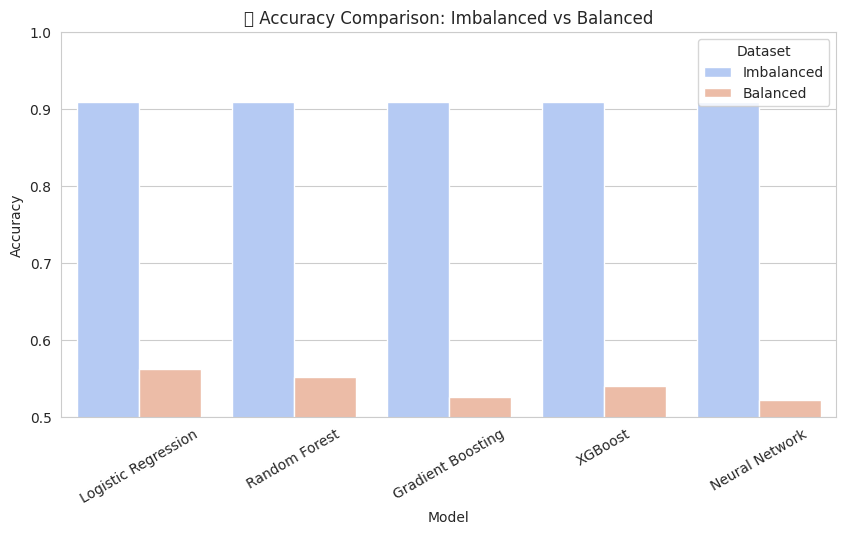

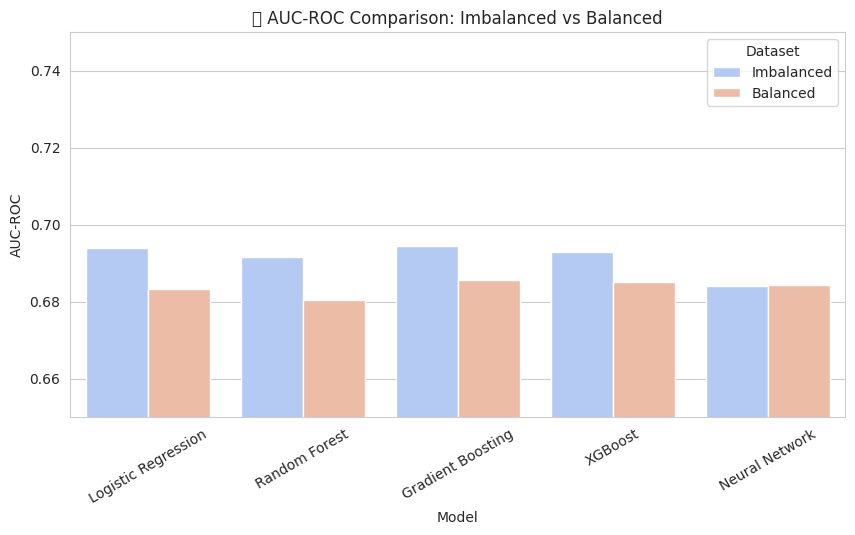

In [ ]:
# Set the plot style
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))

# Plot Accuracy
sns.barplot(data=df_results, x="Model", y="Accuracy", hue="Dataset", palette="coolwarm")
plt.title("🔹 Accuracy Comparison: Imbalanced vs Balanced")
plt.ylim(0.5, 1.0)
plt.xticks(rotation=30)
plt.legend(title="Dataset")
plt.show()

# Plot AUC-ROC
plt.figure(figsize=(10, 5))
sns.barplot(data=df_results, x="Model", y="AUC-ROC", hue="Dataset", palette="coolwarm")
plt.title("🔹 AUC-ROC Comparison: Imbalanced vs Balanced")
plt.ylim(0.65, 0.75)
plt.xticks(rotation=30)
plt.legend(title="Dataset")
plt.show()

#### Applying Fine Tuning for ALgorithms to increase  the performance

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define hyperparameter grid
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Grid search
grid_lr = GridSearchCV(LogisticRegression(max_iter=500), param_grid_lr, cv=5, scoring='f1', n_jobs=-1)
grid_lr.fit(X_train_smote, y_train_smote)

print("🔹 Best Logistic Regression Parameters:", grid_lr.best_params_)
print("✅ Best Logistic Regression F1 Score:", grid_lr.best_score_)

🔹 Best Logistic Regression Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
✅ Best Logistic Regression F1 Score: 0.6037160648399549


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Grid search
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='f1', n_jobs=-1)
grid_rf.fit(X_train_smote, y_train_smote)

print("🔹 Best Random Forest Parameters:", grid_rf.best_params_)
print("✅ Best Random Forest F1 Score:", grid_rf.best_score_)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Define hyperparameter grid
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'subsample': [0.8, 1.0]
}

# Grid search
grid_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=5, scoring='f1', n_jobs=-1)
grid_gb.fit(X_train_smote, y_train_smote)

print("🔹 Best Gradient Boosting Parameters:", grid_gb.best_params_)
print("✅ Best Gradient Boosting F1 Score:", grid_gb.best_score_)

KeyboardInterrupt: 

In [ ]:
from xgboost import XGBClassifier

# Define hyperparameter grid
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Grid search
grid_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_grid_xgb, cv=5, scoring='f1', n_jobs=-1)
grid_xgb.fit(X_train_smote, y_train_smote)

print("🔹 Best XGBoost Parameters:", grid_xgb.best_params_)
print("✅ Best XGBoost F1 Score:", grid_xgb.best_score_)